# Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


from scipy.optimize import minimize
from scipy.optimize import fmin


from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 5]
rcParams.update({'font.size': 12})

## Linear Regression

#### Norm of the error

In [2]:
# Function definitions
def fit1(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))
def fit2(x0,t):
    x,y=t
    return np.sum(np.abs(x0[0]*x + x0[1]-y))
def fit3(x0,t):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y),2))

In [3]:
# The data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92


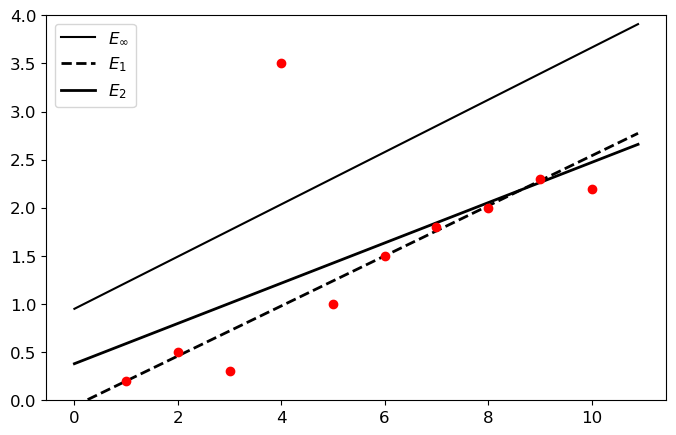

In [4]:
x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2,label='$E_1$')
plt.plot(xf,y3,color='k',linewidth=2,label='$E_2$')
plt.plot(x,y,'o',color='r',linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()

In [5]:
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102


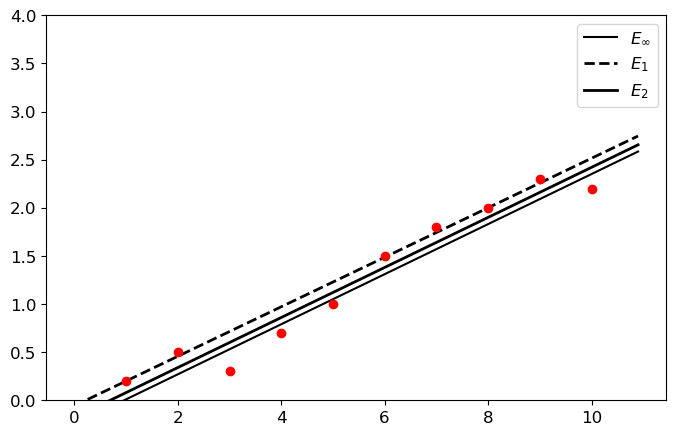

In [6]:
x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2,label='$E_1$')
plt.plot(xf,y3,color='k',linewidth=2,label='$E_2$')
plt.plot(x,y,'o',color='r',linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()

## Gradient Descent

In [7]:
h = 0.5
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)

In [8]:
X,Y = np.meshgrid(x,y)
F0 = 1.5 - 1.0*np.exp(-0.03*(3*np.power(X,2)+np.power(Y,2)))
F = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X,2)+np.power(Y+3,2)))
F2 = F + (0.5 - 1.0*np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2))))

In [9]:
dF0y,dF0x = np.gradient(F0,h,h) 
dF2y,dF2x = np.gradient(F2,h,h) 

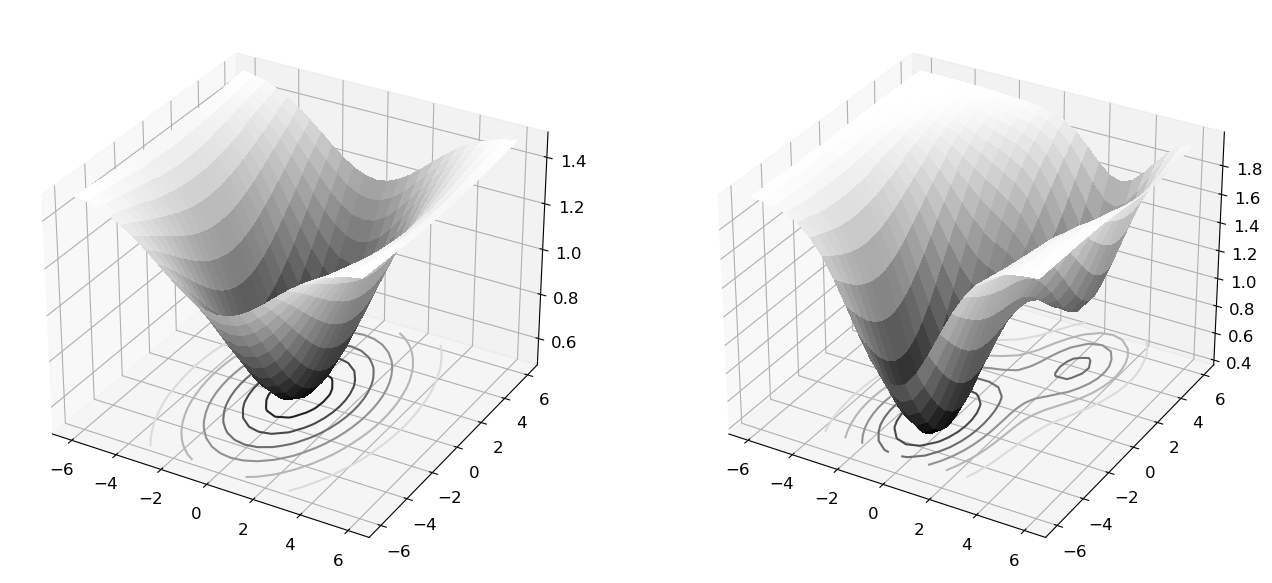

In [10]:
rcParams['figure.figsize'] = [16, 8]
fig,axs = plt.subplots(1,2,subplot_kw={'projection': '3d'})
axs[0].plot_surface(X, Y, F0, cmap='gray',linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')
axs[1].plot_surface(X, Y, F2, cmap='gray',linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')

plt.show()

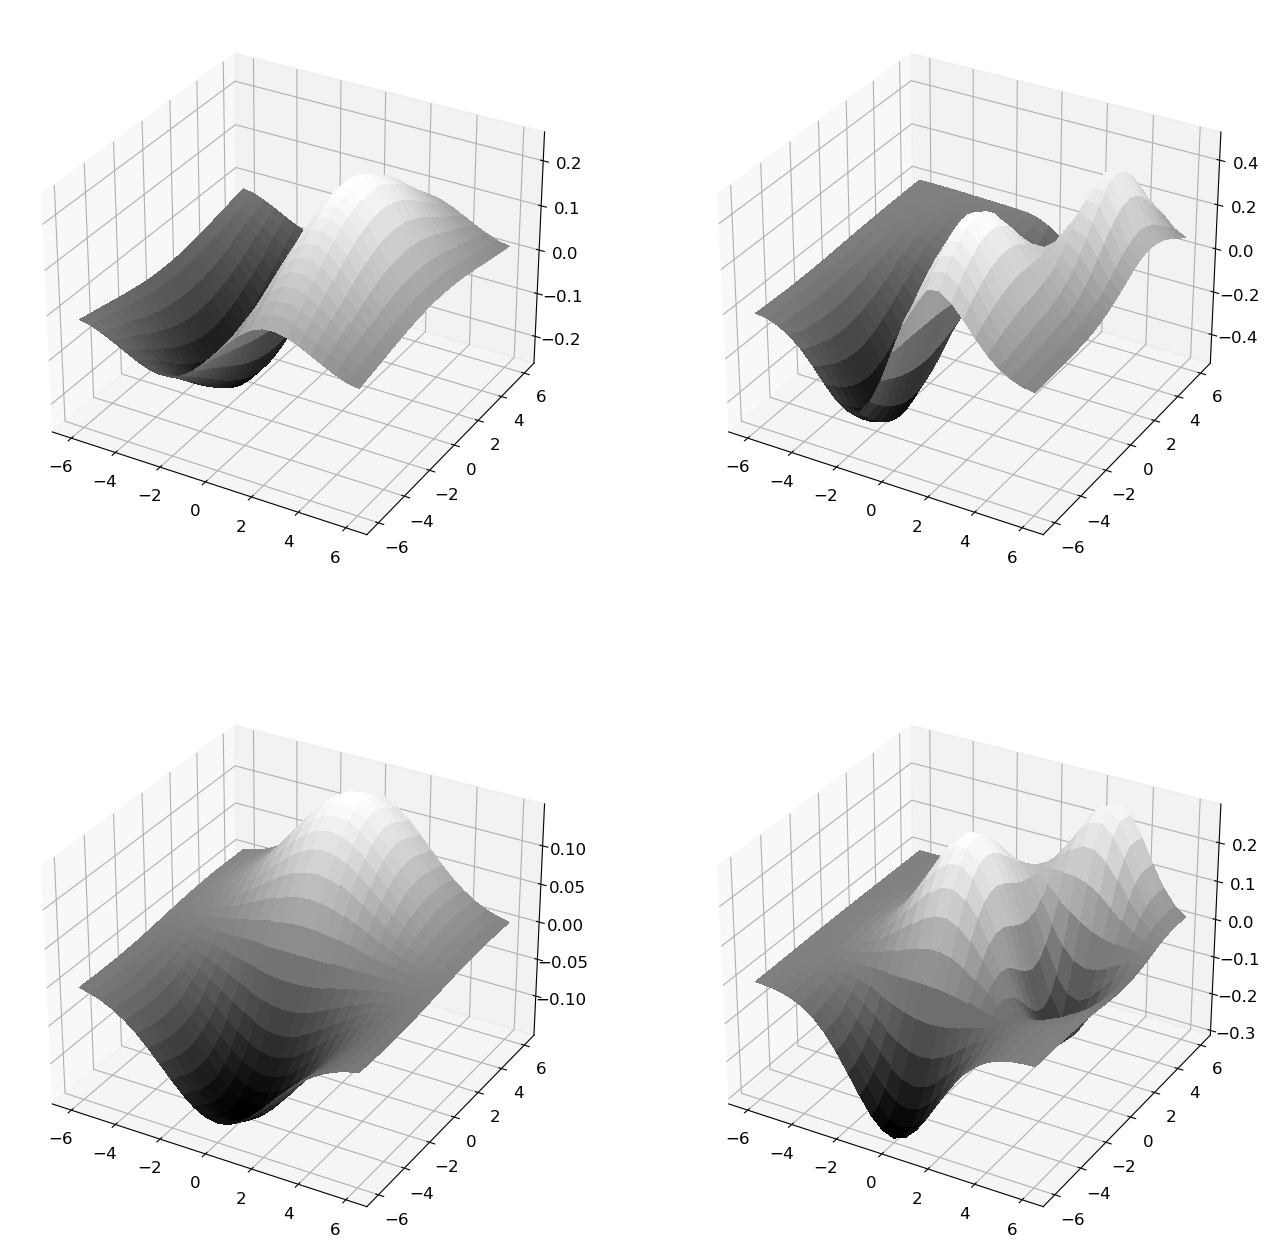

In [11]:
rcParams['figure.figsize'] = [16, 16]
fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='gray',linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='gray',linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='gray',linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='gray',linewidth=0, antialiased=False)

plt.show()

In [12]:
## Gradient Descent
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = np.power(X,2) + 3*np.power(Y,2)

x[0] = 3  # Initial guess
y[0] = 2 

f[0] = x[0]**2 + 3*y[0]**2 # Initial function value

for j in range(len(x)-1):
    Del = (x[j]**2 + 9*y[j]**2)/(2*x[j]**2 + 54*y[j]**2)
    x[j+1] = (1 - 2*Del)*x[j] # update values
    y[j+1] = (1 - 6*Del)*y[j]
    f[j+1] = x[j+1]**2 + 3*y[j+1]**2
    
    if np.abs(f[j+1]-f[j]) < 10**(-6): # check convergence
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

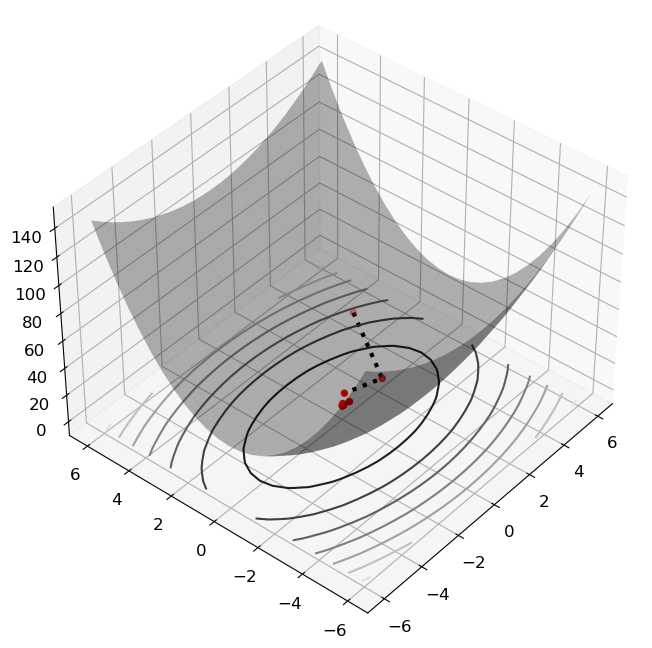

In [13]:
rcParams['figure.figsize'] = [16, 8]
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad,linewidth=0,color='k',alpha=0.3)
ax.scatter(x,y,f,'o',color='r',s=20)
ax.plot(x,y,f,':',color='k',linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()

In [14]:
## Computing the gradient descent with fmin

h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

dFy,dFx = np.gradient(F,h,h)

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x,y,dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x,y,dFy)


x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

def delsearch(Del,t):
    x,y,dfx,dfy,X,Y,F = t
    x0 = x-Del*dfx
    y0 = y-Del*dfy
    return F_interp(x0,y0)


for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    for j in range(len(x)-1):
        t = x[j],y[j],dfx,dfy,X,Y,F
        Del = scipy.optimize.fmin(delsearch,0.2,args=(t,),disp=False);
        x[j+1] = x[j]-Del*dfx # Update x, y, and f
        y[j+1] = y[j]-Del*dfy
        f[j+1] = F_interp(x[j+1],y[j+1])
        dfx = dFx_interp(x[j+1],y[j+1])
        dfy = dFy_interp(x[j+1],y[j+1])
        
        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break
    
    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

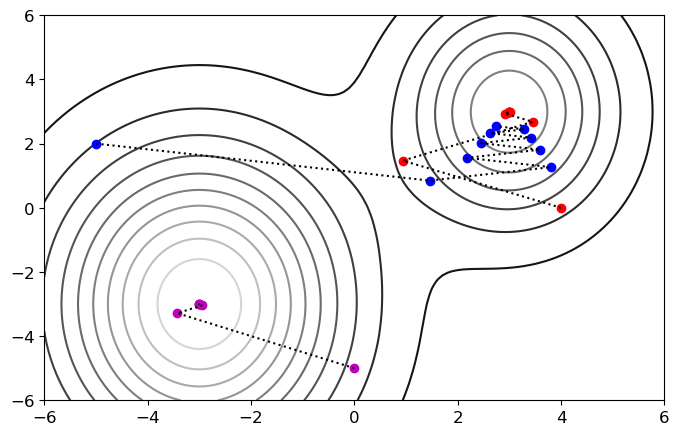

In [15]:
rcParams['figure.figsize'] = [8, 5]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

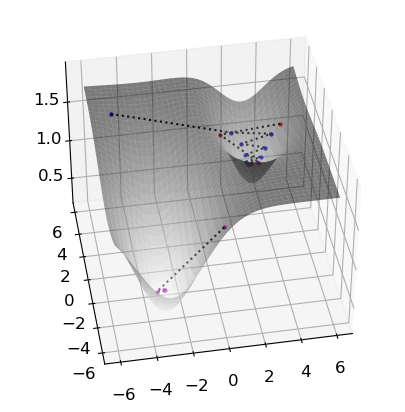

In [16]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=2)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=2)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=2)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

### Alternating Descent

In [17]:
## Alternating Descent
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])
    
    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]
    
    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]
    
    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])
    
    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

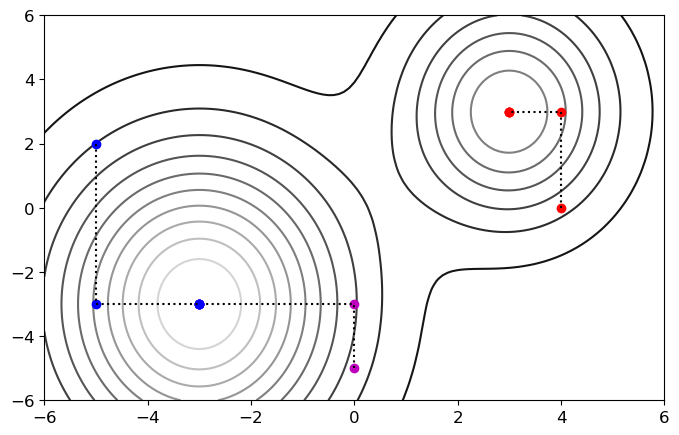

In [18]:
rcParams['figure.figsize'] = [8, 5]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

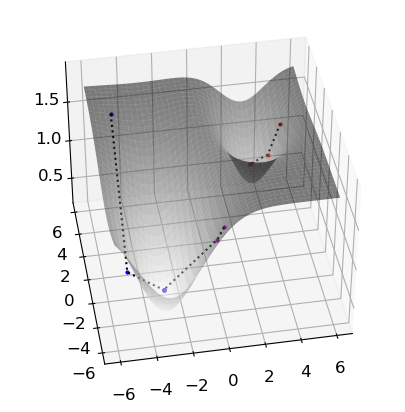

In [19]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=2)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=2)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=2)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

## Under and Overdetermined systems

### Underdetermined

In [20]:
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

In [21]:
def two_norm(x):
    return np.linalg.norm(x,ord=2)

def one_norm(x):
    return np.linalg.norm(x,ord=1)

In [22]:
constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)
x2 = res.x

res = minimize(one_norm, x0, method='SLSQP',constraints=constr)
x1 = res.x

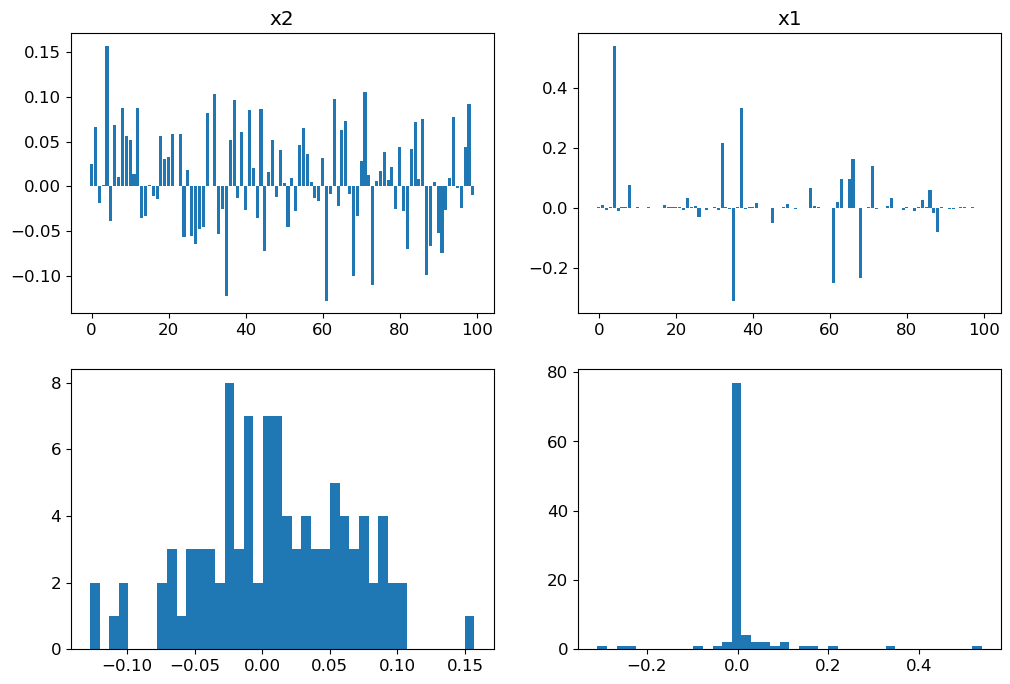

In [23]:
plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)


plt.show()

### Overdetermined

In [24]:
n = 500
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

In [25]:
xdag = np.linalg.pinv(A)@b
lam = np.array([0, 0.1, 0.5])

In [26]:
def reg_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)

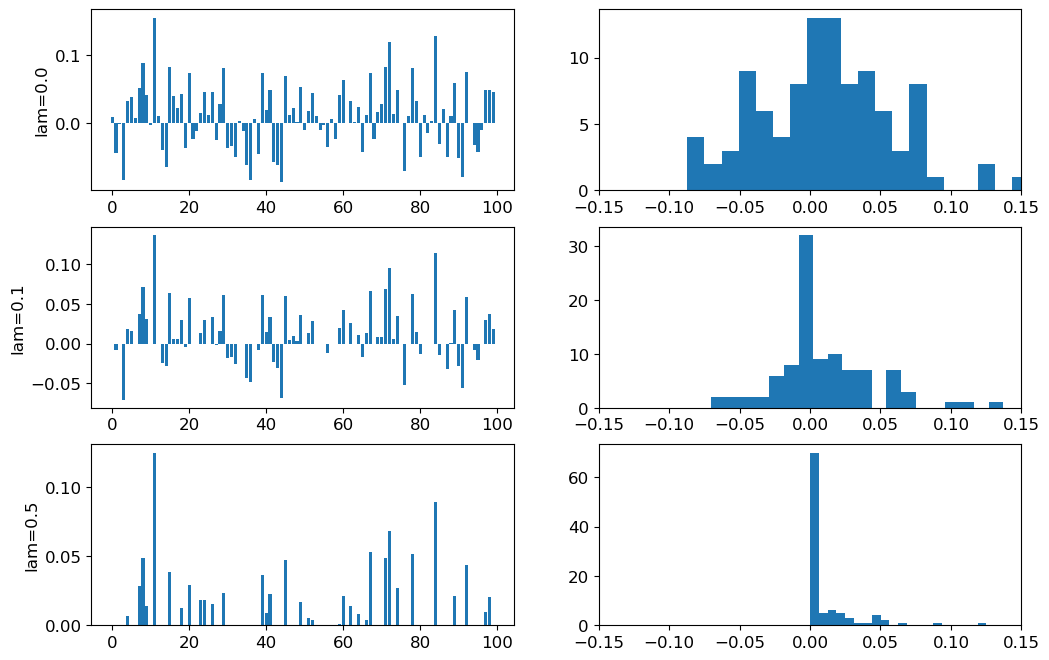

In [27]:
fig,axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm,args=(A,b,lam[j]),x0=xdag)
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)